In [2]:
import os
import numpy as np
import pandas
import cv2
import matplotlib.pyplot as plt

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
folder_path='E:/age-gender/utkface_aligned_cropped/UTKFace'
files = os.listdir(folder_path)
size = len(files)
print("Total samples:",size)
print(files[0])

Total samples: 23708
100_0_0_20170112213500903.jpg.chip.jpg


In [4]:
import os,cv2
age=[]
gender=[]
img_path=[]
for file in os.listdir(folder_path):
    age.append(int(file.split('_')[0]))
    gender.append(int(file.split('_')[1]))

In [5]:
path=os.listdir('E:/age-gender/utkface_aligned_cropped/UTKFace')
for files in path:
    img=cv2.imread('E:/age-gender/utkface_aligned_cropped/UTKFace/'+files,0)
    img=cv2.resize(img,dsize=(64,64))
    img=img.reshape((64,64,1))
    img_path.append(img)
print(len(img_path))

23708


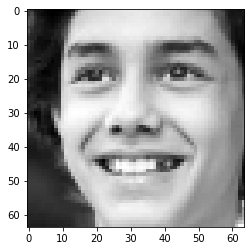

In [6]:
def view(img):
    import matplotlib.pyplot as plt
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()
view(img_path[100])

In [7]:
def calc_ages(a):
    if a>=0 and a<=18:return 1
    elif a<30:return 2
    elif a<50:return 3
    elif a<80:return 4
    return 5

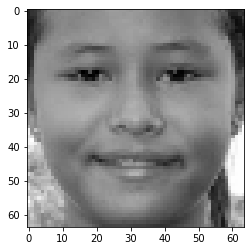

In [8]:
size=len(img_path)
target=np.zeros((size,2),dtype='float32')
features=np.zeros((size,64,64,1),dtype='float32')

for i in range(size):
    target[i][0]=calc_ages(int(age[i]))/5
    target[i][1]=int(gender[i])
    features[i]=img_path[i]
features=features/255
view(features[150])

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,shuffle=True)
print("Size of train sample :",len(x_train))
print("Size of test sample :",len(x_test))

Size of train sample : 18966
Size of test sample : 4742


In [9]:
import keras 
from keras.layers import *
from keras.models import *
from keras import backend as K

In [57]:

inputs=Input(shape=(64,64,1))
L1=Conv2D(16,kernel_size=(3,3),activation='relu')(inputs)
L2=Conv2D(32,kernel_size=(3,3),activation='relu')(L1)
pool1=MaxPooling2D(pool_size=(2,2))(L2)
L3=Conv2D(64,kernel_size=(3,3),activation='relu')(pool1)
L4=Conv2D(128,kernel_size=(3,3),activation='relu')(L3)
pool2=MaxPooling2D(pool_size=(2,2))(L4)
x=Dropout(0.25)(pool2)
Flat=Flatten()(x)

D=Dropout(0.5)
age1=Dense(128,activation='relu')(Flat)
age1=D(age1)
age1=Dense(64,activation='relu')(age1)
age1=D(age1)
age1=Dense(32,activation='relu')(age1)
age1=D(age1)
age1=Dense(16,activation='relu')(age1)
age1=D(age1)
age1=Dense(1,activation='relu')(age1)

x=Dropout(0.5)
gender1=Dense(128,activation='relu')(Flat)
gender1=x(gender1)
gender1=Dense(64,activation='relu')(gender1)
gender1=x(gender1)
gender1=Dense(32,activation='relu')(gender1)
gender1=x(gender1)
gender1=Dense(16,activation='relu')(gender1)
gender1=x(gender1)
gender1=Dense(8,activation='relu')(gender1)
gender1=x(gender1)
gender1=Dense(1,activation='sigmoid')(gender1)




In [58]:
model = Model(inputs=inputs, outputs=[age1,gender1])
model.compile(optimizer = 'adam', loss =['mse','binary_crossentropy'],metrics=['accuracy'])

In [59]:
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d_43 (Conv2D)             (None, 62, 62, 16)   160         ['input_12[0][0]']               
                                                                                                  
 conv2d_44 (Conv2D)             (None, 60, 60, 32)   4640        ['conv2d_43[0][0]']              
                                                                                                  
 max_pooling2d_22 (MaxPooling2D  (None, 30, 30, 32)  0           ['conv2d_44[0][0]']              
 )                                                                                         

In [12]:
from keras.utils import *
plot_model(model)

NameError: name 'model' is not defined

In [63]:
h = model.fit(x_train,[y_train[:,0],y_train[:,1]],validation_data=(x_test,[y_test[:,0],y_test[:,1]]),epochs = 25, batch_size=128,shuffle = True)

Epoch 1/25
149/149 [==============================] - 182s 1s/step - loss: 0.7554 - dense_109_loss: 0.0632 - dense_115_loss: 0.6922 - dense_109_accuracy: 0.0112 - dense_115_accuracy: 0.5207 - val_loss: 0.7301 - val_dense_109_loss: 0.0413 - val_dense_115_loss: 0.6888 - val_dense_109_accuracy: 0.0141 - val_dense_115_accuracy: 0.5310
Epoch 2/25
149/149 [==============================] - 193s 1s/step - loss: 0.6937 - dense_109_loss: 0.0533 - dense_115_loss: 0.6404 - dense_109_accuracy: 0.0152 - dense_115_accuracy: 0.6210 - val_loss: 0.5384 - val_dense_109_loss: 0.0369 - val_dense_115_loss: 0.5015 - val_dense_109_accuracy: 0.0202 - val_dense_115_accuracy: 0.8087
Epoch 3/25
149/149 [==============================] - 197s 1s/step - loss: 0.5862 - dense_109_loss: 0.0464 - dense_115_loss: 0.5397 - dense_109_accuracy: 0.0179 - dense_115_accuracy: 0.7226 - val_loss: 0.4226 - val_dense_109_loss: 0.0313 - val_dense_115_loss: 0.3913 - val_dense_109_accuracy: 0.0236 - val_dense_115_accuracy: 0.8275
E

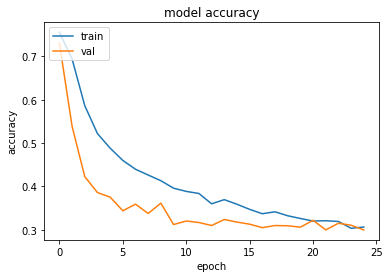

In [64]:
history = h
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [65]:
model.save('my_model.h5')

In [10]:
model = tf.keras.models.load_model('my_model.h5')

In [11]:
def get_gen(p):
    if p<0.5:return "Male"
    return "Female"

In [36]:
import math
def get_age(d):
    if d<=0.4:return "0-18"
    if d<=0.5:return "18-30"
    if d<=0.6:return "30-50"
    if d<=0.7:return "50-80"
    if d<=0.8:return "80+"
    return "no prediction"

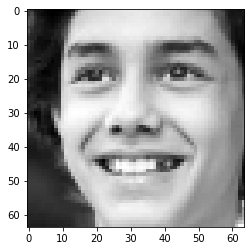

Actual Gender: Male Age: 10
1/1 [==============================] - 0s 46ms/step
Values: [array([[0.40538818]], dtype=float32), array([[0.433424]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 18-30


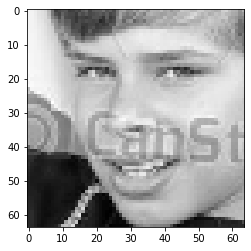

Actual Gender: Male Age: 10
1/1 [==============================] - 0s 38ms/step
Values: [array([[0.44045734]], dtype=float32), array([[0.00243601]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 18-30


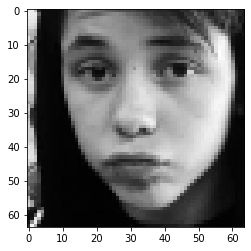

Actual Gender: Male Age: 16
1/1 [==============================] - 0s 33ms/step
Values: [array([[0.41139105]], dtype=float32), array([[0.8166683]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 18-30


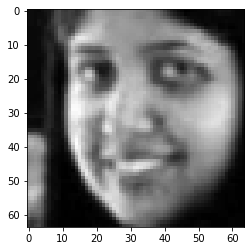

Actual Gender: Female Age: 22
1/1 [==============================] - 0s 42ms/step
Values: [array([[0.44606286]], dtype=float32), array([[0.9841751]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 18-30


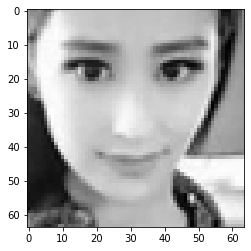

Actual Gender: Female Age: 25
1/1 [==============================] - 0s 35ms/step
Values: [array([[0.42083693]], dtype=float32), array([[0.9950185]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 18-30


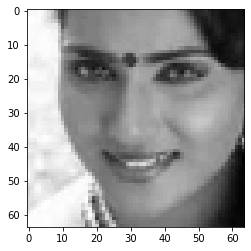

Actual Gender: Female Age: 22
1/1 [==============================] - 0s 53ms/step
Values: [array([[0.48136917]], dtype=float32), array([[0.8893209]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 18-30


In [37]:
def get_result(sample):
    sample = sample/255
    val = model.predict( np.array([ sample ]) )    
    age = get_age(val[0])
    gender = get_gen(val[1])
    print("Values:",val,"\nPredicted Gender:",gender,"Predicted Age:",age)
    
    
indexes = [100,45,856,3658,5535,3645]
for idx in indexes:
    sample = img_path[idx]
    view(sample)
    print("Actual Gender:",get_gen(gender[idx]),"Age:",age[idx])
    res = get_result(sample)

In [38]:
cap=cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame=cap.read()
    #frame=frame.reshape((64,64,1))
    #result=model(img)
    cv2.imshow('balak')
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break 
cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [39]:
cap.release()
cv2.destroyAllWindows()

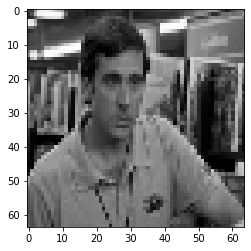

1/1 [==============================] - 0s 32ms/step
Values: [array([[0.4935058]], dtype=float32), array([[0.69026655]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 18-30


In [40]:
img1=cv2.imread("C:/Users/HP/Downloads/test.jpeg",0)
img1=cv2.resize(img1,dsize=(64,64))
img1=img1.reshape((64,64,1))
view(img1)
res = get_result(img1)

In [ ]:
import math
def get_age(d):
    if d>=0.4 and d<=0.45:return "0-18"
    if d>=0.45 and d<=0.50:return "18-30"
    if d>=0.50 and d<=0.55:return "30-50"
    if d>=0.55 and d<=0.60:return "50-80"
    if d>=0.6:return "80+"
    return "no prediction"